<a href="https://colab.research.google.com/github/saxonmahar/Data_Science/blob/main/semisupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
rng = np.random.RandomState(42)
y_train_semi = np.copy(y_train)
n_total = len(y_train)
n_labeled = int(0.1 * n_total)
unlabeled_indices = rng.choice(n_total, size=n_total - n_labeled, replace=False)
y_train_semi[unlabeled_indices] = -1

In [5]:
model = LabelPropagation()
model.fit(X_train, y_train_semi)

LabelPropagation()

In [8]:
y_all = model.transduction_

In [9]:
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_train)

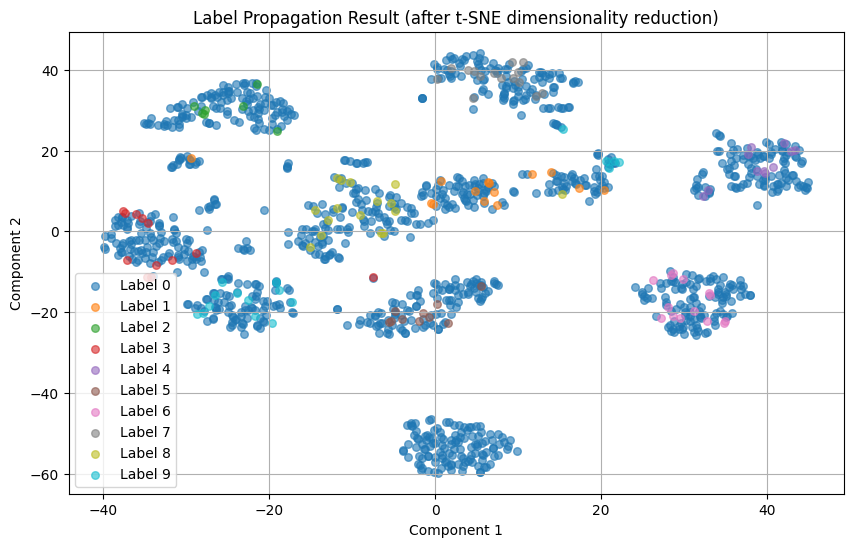

In [10]:
plt.figure(figsize=(10, 6))
for i in range(10):
    idx = (y_all == i)
    plt.scatter(X_reduced[idx, 0], X_reduced[idx, 1], label=f'Label {i}', alpha=0.6, s=30)

plt.title("Label Propagation Result (after t-SNE dimensionality reduction)")
plt.legend()
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

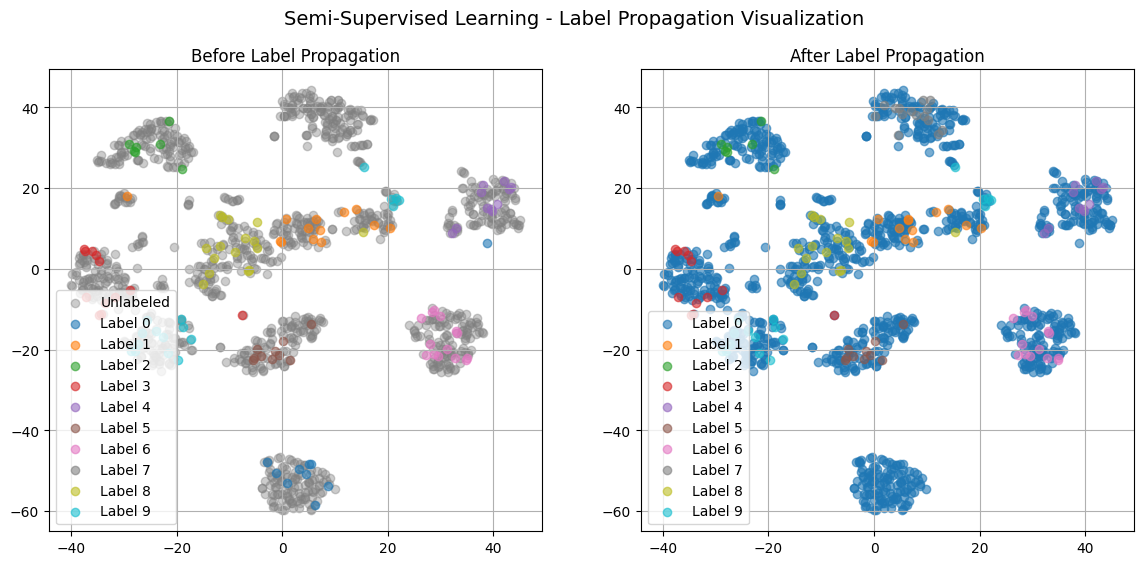

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for label in np.unique(y_train_semi):
    mask = (y_train_semi == label)
    if label == -1:
        axes[0].scatter(X_reduced[mask, 0], X_reduced[mask, 1], c='gray', label='Unlabeled', alpha=0.4)
    else:
        axes[0].scatter(X_reduced[mask, 0], X_reduced[mask, 1], label=f'Label {label}', alpha=0.6)
axes[0].set_title("Before Label Propagation")
axes[0].legend()
axes[0].grid(True)
for i in range(10):
    idx = (y_all == i)
    axes[1].scatter(X_reduced[idx, 0], X_reduced[idx, 1], label=f'Label {i}', alpha=0.6)
axes[1].set_title("After Label Propagation")
axes[1].legend()
axes[1].grid(True)

plt.suptitle("Semi-Supervised Learning - Label Propagation Visualization", fontsize=14)
plt.show()